<a href="https://colab.research.google.com/github/Aarthi61/Aarthi61/blob/main/copy_project_video_and_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2609, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 2609 (delta 87), reused 209 (delta 70), pack-reused 2346
Receiving objects: 100% (2609/2609), 69.71 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (1170/1170), done.


In [2]:
cd DeOldify

/content/DeOldify


In [3]:
## Import necessary libraries and set GPU device
from deoldify import device
from deoldify.device_id import DeviceId


In [4]:
# Choose GPU0 or other GPU if available
device.set(device=DeviceId.GPU0)

<DeviceId.GPU0: 0>

In [5]:
!pip install ffmpeg-python


In [6]:
pip install yt-dlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.5 MB/s eta 0:00:00


In [7]:


# Choose GPU0 or other GPU if available
device.set(device=DeviceId.GPU0)

# Import other required libraries
import fastai
from deoldify.visualize import *
from pathlib import Path
import torch
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

# Create a 'models' directory and download the video colorization model
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeVideo_gen.pth -O ./models/ColorizeVideo_gen.pth
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth






INFO:numexpr.utils:NumExpr defaulting to 2 threads.


NumExpr defaulting to 2 threads.
mkdir: cannot create directory ‘models’: File exists
--2024-03-07 18:57:09--  https://data.deepai.org/deoldify/ColorizeVideo_gen.pth
Resolving data.deepai.org (data.deepai.org)... 143.244.49.180, 2400:52e0:1a01::1114:1
Connecting to data.deepai.org (data.deepai.org)|143.244.49.180|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874066230 (834M) [application/octet-stream]
Saving to: ‘./models/ColorizeVideo_gen.pth’

./models/ColorizeVi 100%[===================>] 833.57M  4.94MB/s    in 2m 51s  

2024-03-07 19:00:00 (4.87 MB/s) - ‘./models/ColorizeVideo_gen.pth’ saved [874066230/874066230]

mkdir: cannot create directory ‘models’: File exists
--2024-03-07 19:00:00--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 143.244.50.211, 2400:52e0:1a01::1110:1
Connecting to data.deepai.org (data.deepai.org)|143.244.50.211|:443... connected.
HTTP request sent, awaiting response... 2

In [8]:
# Function to colorize a video from a given URL
def colorize_video(source_url, render_factor, watermarked=True):
    colorizer = get_video_colorizer(render_factor=render_factor)
    if source_url is not None and source_url !='':
        video_path = colorizer.colorize_from_url(source_url, 'video.mp4', watermarked=watermarked)
        show_video_in_notebook(video_path)
    else:
        print('Provide a video URL and try again.')

# Function to colorize an image from a given URL
def colorize_image(source_url, render_factor, watermarked=True):
    colorizer = get_image_colorizer(artistic=True)
    if source_url is not None and source_url !='':
        image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
        show_image_in_notebook(image_path)
    else:
        print('Provide an image URL and try again.')


In [9]:
# Menu for user to choose image or video colorization
print("Choose an option:")
print("1. Colorize Video")
print("2. Colorize Image")
choice = input("Enter 1 or 2: ")


Choose an option:
1. Colorize Video
2. Colorize Image
Enter 1 or 2: 2


Enter the image URL: https://images.unsplash.com/photo-1505377059067-e285a7bac49b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8ZnJpZW5kcyUyMGJsYWNrJTIwYW5kJTIwd2hpdGV8ZW58MHx8MHx8fDA%3D&w=1000&q=80
Enter the render factor (min: 7, max: 40): 10
Watermarked? (True/False): True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can als

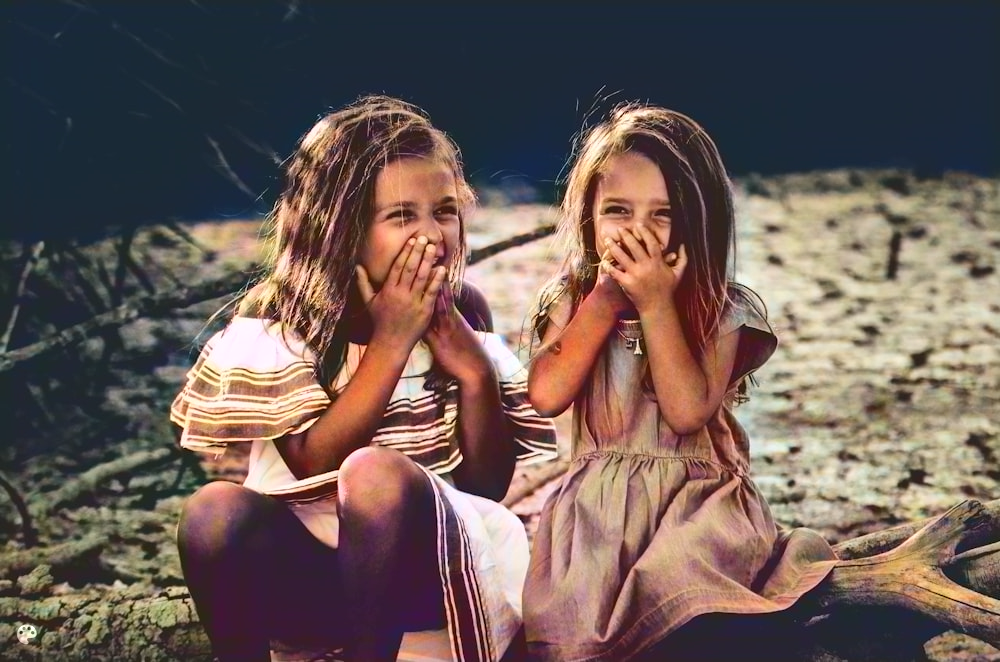

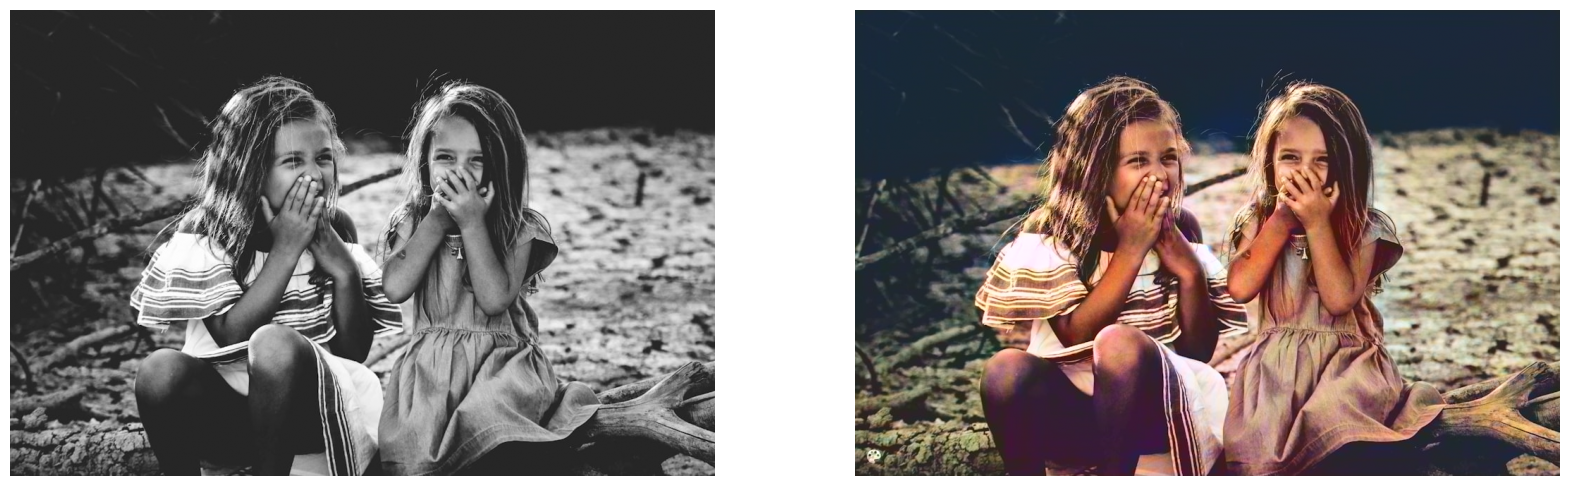

In [10]:
if choice == "1":
    # Video colorization
    source_url = input("Enter the video URL: ")
    render_factor = int(input("Enter the render factor (min: 5, max: 40): "))
    watermarked_input = input("Watermarked? (True/False): ").lower()
    watermarked = watermarked_input == "true"
    colorize_video(source_url, render_factor, watermarked)
elif choice == "2":
    # Image colorization
    source_url = input("Enter the image URL: ")
    render_factor = int(input("Enter the render factor (min: 7, max: 40): "))
    watermarked_input = input("Watermarked? (True/False): ").lower()
    watermarked = watermarked_input == "true"
    colorize_image(source_url, render_factor, watermarked)
else:
    print("Invalid choice. Please enter 1 or 2.")


In [11]:
# Function to colorize a video from a given URL
def colorize_video(source_url, render_factor, watermarked=True):
    colorizer = get_video_colorizer(render_factor=render_factor)
    if source_url is not None and source_url !='':
        video_path = colorizer.colorize_from_url(source_url, 'video.mp4', watermarked=watermarked)
        show_video_in_notebook(video_path)
    else:
        print('Provide a video URL and try again.')

# Function to colorize an image from a given URL
def colorize_image(source_url, render_factor, watermarked=True):
    colorizer = get_image_colorizer(artistic=True)
    if source_url is not None and source_url !='':
        image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
        show_image_in_notebook(image_path)
    else:
        print('Provide an image URL and try again.')


In [12]:
# Menu for user to choose image or video colorization
print("Choose an option:")
print("1. Colorize Video")
print("2. Colorize Image")
choice = input("Enter 1 or 2: ")



Choose an option:
1. Colorize Video
2. Colorize Image
Enter 1 or 2: 1


In [ ]:
if choice == "1":
    # Video colorization
    source_url = input("Enter the video URL: ")
    render_factor = int(input("Enter the render factor (min: 5, max: 40): "))
    watermarked_input = input("Watermarked? (True/False): ").lower()
    watermarked = watermarked_input == "true"
    colorize_video(source_url, render_factor, watermarked)
elif choice == "2":
    # Image colorization
    source_url = input("Enter the image URL: ")
    render_factor = int(input("Enter the render factor (min: 7, max: 40): "))
    watermarked_input = input("Watermarked? (True/False): ").lower()
    watermarked = watermarked_input == "true"
    colorize_image(source_url, render_factor, watermarked)
else:
    print("Invalid choice. Please enter 1 or 2.")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 121MB/s]


[youtube] Extracting URL: https://www.youtube.com/shorts/CTcTA8MZ8YU?feature=share
[youtube] CTcTA8MZ8YU: Downloading webpage
[youtube] CTcTA8MZ8YU: Downloading ios player API JSON
[youtube] CTcTA8MZ8YU: Downloading android player API JSON
[youtube] CTcTA8MZ8YU: Downloading player 9bb09009
[youtube] CTcTA8MZ8YU: Downloading m3u8 information
[info] CTcTA8MZ8YU: Downloading 1 format(s): 623+140
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 6
[download] Destination: video/source/video.f623.mp4
[download] 100% of    2.78MiB in 00:00:03 at 780.92KiB/s             
[download] Destination: video/source/video.f140.m4a
[download] 100% of  453.19KiB in 00:00:00 at 1.15MiB/s   
[Merger] Merging formats into "video/source/video.mp4"
Deleting original file video/source/video.f623.mp4 (pass -k to keep)
Deleting original file video/source/video.f140.m4a (pass -k to keep)


In [ ]:
# Function to colorize a video from a given URL
def colorize_video(source_url, render_factor, watermarked=True):
    colorizer = get_video_colorizer(render_factor=render_factor)
    if source_url is not None and source_url !='':
        video_path = colorizer.colorize_from_url(source_url, 'video.mp4', watermarked=watermarked)
        show_video_in_notebook(video_path)
    else:
        print('Provide a video URL and try again.')

# Function to colorize an image from a given URL
def colorize_image(source_url, render_factor, watermarked=True):
    colorizer = get_image_colorizer(artistic=True)
    if source_url is not None and source_url !='':
        image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
        show_image_in_notebook(image_path)
    else:
        print('Provide an image URL and try again.')


In [ ]:
# Menu for user to choose image or video colorization
print("Choose an option:")
print("1. Colorize Video")
print("2. Colorize Image")
choice = input("Enter 1 or 2: ")



Choose an option:
1. Colorize Video
2. Colorize Image
Enter 1 or 2: 2


Enter the image URL: https://images.unsplash.com/photo-1505377059067-e285a7bac49b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8ZnJpZW5kcyUyMGJsYWNrJTIwYW5kJTIwd2hpdGV8ZW58MHx8MHx8fDA%3D&w=1000&q=80
Enter the render factor (min: 7, max: 40): 10
Watermarked? (True/False): true


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can als

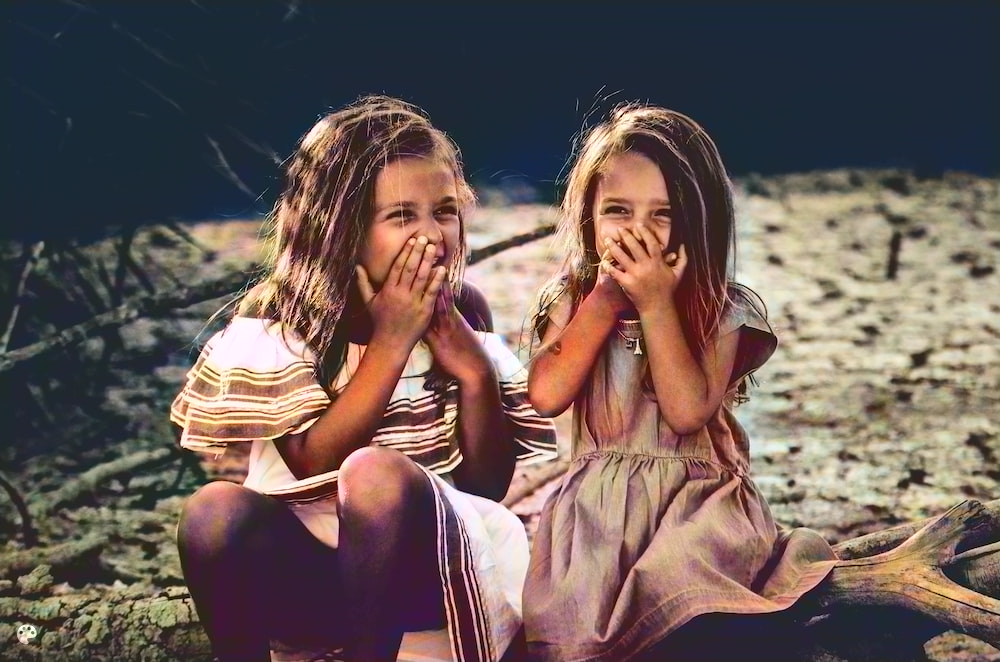

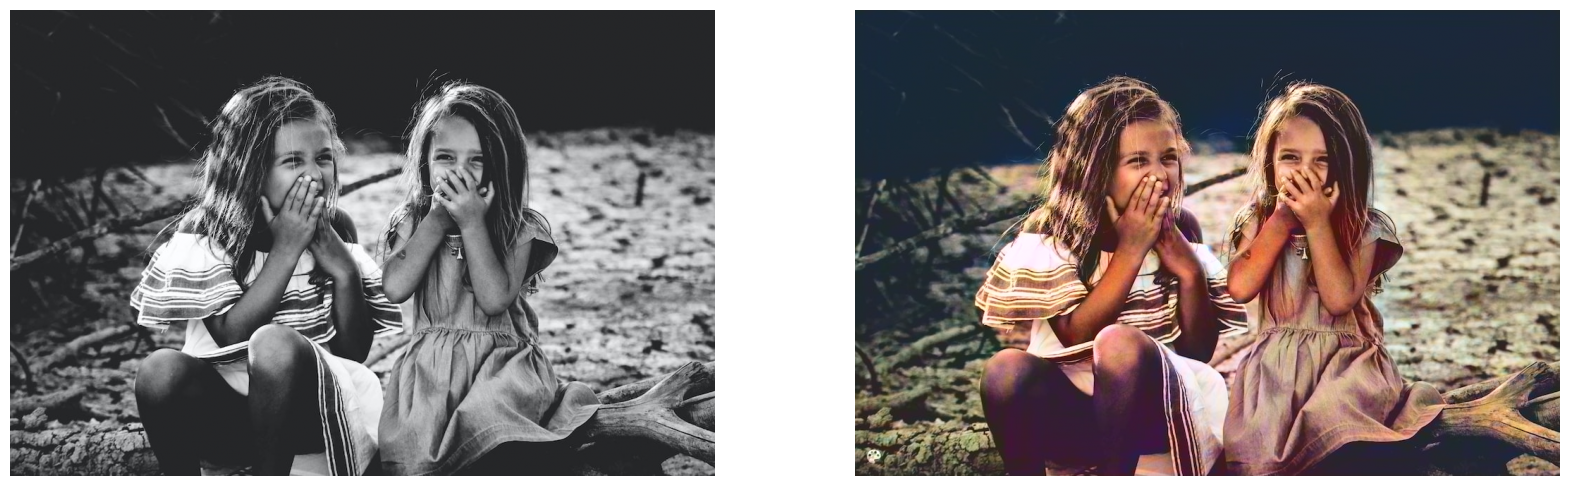

In [ ]:
if choice == "1":
    # Video colorization
    source_url = input("Enter the video URL: ")
    render_factor = int(input("Enter the render factor (min: 5, max: 40): "))
    watermarked_input = input("Watermarked? (True/False): ").lower()
    watermarked = watermarked_input == "true"
    colorize_video(source_url, render_factor, watermarked)
elif choice == "2":
    # Image colorization
    source_url = input("Enter the image URL: ")
    render_factor = int(input("Enter the render factor (min: 7, max: 40): "))
    watermarked_input = input("Watermarked? (True/False): ").lower()
    watermarked = watermarked_input == "true"
    colorize_image(source_url, render_factor, watermarked)
else:
    print("Invalid choice. Please enter 1 or 2.")


In [ ]:
image URL:https://www.alamy.com/the-indian-politician-mahatma-gandhi-in-marseilles-he-is-on-his-way-to-london-for-the-indian-round-table-conference-gandhi-was-nominated-several-times-for-the-nobel-peace-prize-during-his-lifetime-image247157689.html?imageid=B7A90904-7CD5-4C36-8F09-45C857FDF046&p=291620&pn=1&searchId=d187eb9e18db0eca74e3b21a8388b8d3&searchtype=0


https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdXtfSj6xB2ybP8kif5R0vMnxOsCR4z36S7D74rlH6Ui9oj692UuNV_q1tk3VT81OL0ZQ&usqp=CAU
